<a href="https://colab.research.google.com/github/DavidD95/Clase_EDA_2024/blob/main/Proyecto_ClaseEDA.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# **Pregunta SMART**


**1. Descripción del Problema para la Organización:**

Actualmente en el servicio de Radioterapia falta de un sistema de optimización de la ocupación de los equipos biomédicos lo cual
provoca problemas como oportunidad lejana en la atención,
subutilización en ciertos momentos del día, y potenciales pérdidas de ingresos debido a la ineficiencia operativa.

**2. Justificación:**

La ciencia de datos puede analizar los datos históricos de ocupación para identificar patrones, picos de demanda
y factores que influyen en la variabilidad de la ocupación.
La IA puede ser utilizada para optimizar la asignación de citas y tiempos de uso de los equipos, minimizando tiempos muertos y maximizando la utilización del equipo.

**3. Pregunta SMART:**

¿Cual es la ocupación de los equipos en Radioterapia por franja horaria en el primer semestre del 2024?

# **Anáisis Exploratorio de Datos**



In [3]:
# Importar la librería pandas con el alias pd
import pandas as pd
#MATPLOTLIB
%pip install matplotlib
import matplotlib.pyplot as plt
%matplotlib inline
#SEABORN
%pip install seaborn
import seaborn as sns


Note: you may need to restart the kernel to use updated packages.
Note: you may need to restart the kernel to use updated packages.


In [4]:
#from google.colab import drive
#drive.mount('/content/drive')


#en Google Colab"

#other_path = "/content/drive/MyDrive/Maestria CD ICESI/1 Semestre/Analisis Exploratorio de Datos/Prestaciones Radioterapia 2024 Ene-Jul.xlsx"
#df = pd.read_excel(other_path)

In [5]:
# Leer el conjunto de datos por medio de la URL proporcionada y asignarlo a la variable "df"

# Load the Excel file from the GitHub repository
url = "https://raw.githubusercontent.com/DavidD95/Clase_EDA_2024/main/BD_CIRUGIA_2024.xlsx"
%pip install openpyxl
df = pd.read_excel(url)

In [6]:
# Mostrar las primeras 5 filas del dataset utilizando el método dataframe.head()
print("Las primeras 5 filas del data frame:")
df.head(5)

Las primeras 5 filas del data frame:


,Fecha planif.,Hora planif.,Fecha apertura monitor,Hora apertura monitor,Tiempo Transc (en MIN).,Habit.,Duración,Nombre del Paciente,Sexo,Edad,...,ASA,Aseguradora,Teléfono,Condición de Egreso,Tipo de Herida,Equipo IQ,Anestesiólogo,Equipo de Cirujanos,Equipo de Anestesiólogos,Prioridad solicitud
0,2024-01-01,06:00:00,2024-01-01,01:06:00,-296,QU-04,60,LESLY VALERIA VERA PINO,F,27,...,2.0,EPS SANITAS S.A.S. RS,3135935933 31456,NaN,NaN,"CIR:BARONA WIEDMAN JUAN SEBASTIAN,\nCIRA:MONTE...","OCAMPO MATEUS, EDWARD",BARONA WIEDMAN JUAN SEBASTIAN.,OCAMPO MATEUS EDWARD.,Urgente
1,2024-01-01,06:00:00,2024-01-01,02:13:00,-240,QU-01,60,JOSHUA DAVID ANTEQUERA SANDOVAL,M,2,...,1.0,NUEVA EPS S.A. RC,3022141596,1.0,2.0,"CIR:MURCIA RODRIGUEZ WILLIAM ALFREDO,\nANE:OCA...","OCAMPO MATEUS, EDWARD",MURCIA RODRIGUEZ WILLIAM ALFREDO.,OCAMPO MATEUS EDWARD.,Emergente
2,2024-01-01,06:00:00,2024-01-01,06:15:19,10,QU-03,60,ALEXANDER LOPEZ ACEVEDO,M,22,...,4.0,SERVICIO OCCID. DE SALUD RC,NO TIENE,NaN,NaN,"CIR:PALACIOS RODRIGUEZ HELMER EMILIO,\nANE:OCA...","OCAMPO MATEUS, EDWARD",PALACIOS RODRIGUEZ HELMER EMILIO.,"OCAMPO MATEUS EDWARD,\nPEREZ ESPINOSA MAURICIO.",Emergente
3,2024-01-01,09:00:00,2024-01-01,07:07:00,-10,QU-01,60,JOFFREN CRISTOBAL OINO YACUE,M,8,...,2.0,ASOC INDIGENA DEL CAUCA AIC EPS RS,3208587512,NaN,NaN,"CIR:MIRANDA DIAZ AUDREY JOSE,\nANE:ARIZA CADEN...","ARIZA CADENA, FREDY JIOVANNY",MIRANDA DIAZ AUDREY JOSE.,ARIZA CADENA FREDY JIOVANNY.,Urgente
4,2024-01-01,13:50:00,2024-01-01,08:00:00,-350,QU-01,60,MARIA DULMARIS BALANTA,F,68,...,4.0,ASMET SALUD EPS S.A.S. RS,3147796409 31227,NaN,NaN,"CIR:CADAVID ALVEAR EDUARDO ALBERTO,\nANE:VELAS...","VELASQUEZ GUTIERREZ, JUAN JOSE","CADAVID ALVEAR EDUARDO ALBERTO,\nVELASQUEZ GUT...",VELASQUEZ GUTIERREZ JUAN JOSE.,Urg. Relativa


In [7]:
print("Las últimas 5 filas del data frame\n")
df.tail(5)

Las últimas 5 filas del data frame



,Fecha planif.,Hora planif.,Fecha apertura monitor,Hora apertura monitor,Tiempo Transc (en MIN).,Habit.,Duración,Nombre del Paciente,Sexo,Edad,...,ASA,Aseguradora,Teléfono,Condición de Egreso,Tipo de Herida,Equipo IQ,Anestesiólogo,Equipo de Cirujanos,Equipo de Anestesiólogos,Prioridad solicitud
11156,2024-07-31,12:00:00,2024-07-31,19:41:32,450,QU-03,60,SIDNEY FELIPE YANDY FERNANDEZ,M,28,...,3.0,ASOC INDIGENA DEL CAUCA AIC EPS RS,3161964900,NaN,NaN,"CIR:RODRIGUEZ HOLGUIN FERNANDO,\nANE:GIRALDO C...","GIRALDO CAICEDO, ALBERTO",RODRIGUEZ HOLGUIN FERNANDO.,GIRALDO CAICEDO ALBERTO.,Urgente
11157,2024-07-31,06:50:00,2024-07-31,20:10:00,810,QU-02,60,CARLOS DIOFANOR ASPRILLA MURILLO,M,63,...,3.0,COMFACHOCO URGENCIA VITAL,3148727544,NaN,NaN,"ANE:CUERVO SOLANO JUAN ANDRES,\nINS:ENCISO BOL...","CUERVO SOLANO, JUAN ANDRES",RODRIGUEZ HOLGUIN FERNANDO.,CUERVO SOLANO JUAN ANDRES.,Urgente
11158,2024-07-31,20:00:00,2024-07-31,20:30:22,25,QU-01,110,MARIANA POTOSI LUNA,F,9,...,4.0,FIDUCIARIA LA PREVISORA S.A FOMAG,3102787408 31348,NaN,NaN,"INS:RAMIREZ DIEZ INGRID JOHANNA,\nCIRC:FAJARDO...","FRANCO VIDAL, CARLOS EDUARDO",ALZATE CARVAJAL VERONICA.,FRANCO VIDAL CARLOS EDUARDO.,Urgente
11159,2024-07-31,08:30:00,2024-07-31,21:26:00,832,QU-01,60,EDGAR GIOVANNY MENDEZ CARBALLO,M,38,...,2.0,EMSSANAR EPS S.A.S. RS,3926027,NaN,NaN,"CIR:RODRIGUEZ HOLGUIN FERNANDO,\nANE:GIRALDO C...","GIRALDO CAICEDO, ALBERTO",RODRIGUEZ HOLGUIN FERNANDO.,GIRALDO CAICEDO ALBERTO.,Emergente
11160,2024-07-31,21:00:00,2024-07-31,22:37:00,60,QU-01,60,YAMILETH DIAZ GURRUTE,F,36,...,2.0,FIDUCIARIA LA PREVISORA S.A FOMAG,3042134246,NaN,NaN,"CIR:RIASCOS CAIPE NATALIA CATALINA,\nANE:CUERV...","CUERVO SOLANO, JUAN ANDRES",RIASCOS CAIPE NATALIA CATALINA.,CUERVO SOLANO JUAN ANDRES.,Urgente


In [8]:
print(df.columns)

Index(['Fecha planif.', 'Hora planif.', 'Fecha apertura monitor',
       'Hora apertura monitor', 'Tiempo Transc (en MIN).', 'Habit.',
       'Duración', 'Nombre del Paciente', 'Sexo', 'Edad',
       'Relación Procedimientos vs Equipo Médico', 'Episodio', 'Habitación',
       'UO de enferm.solic.', 'Empleado Responsable', 'Especialidad',
       'Preparac. Quirófano - Inicio', 'Preparac. Quirófano - Final',
       'Preparación - Duración', 'Incisión - Inicio', 'Sutura - Fin',
       'Cirugia - Duración', 'Anestesia - Inicio', 'Anestesia - Inicio.1',
       'Anestesia - Duración', 'Instrumentador - Inicio',
       'Instrumentador - Fin', 'Instrumentadora - Duración',
       'Ingreso del Paciente Quirófano', 'Salida del Quirófano',
       'Duración Quirofano del Paciente', 'Recuperación - Ingreso',
       'Recuperación - Salida', 'Recuperación - Duración',
       'Antibiótico - Inicio', 'Antibiótico - Fin', 'Antibiótico - Duración',
       'Signo +/-', 'Profilaxis Antibiótico', 'Req.Antib

In [9]:
# Ver la información de "df"
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 11161 entries, 0 to 11160
Data columns (total 51 columns):
 #   Column                                    Non-Null Count  Dtype         
---  ------                                    --------------  -----         
 0   Fecha planif.                             11160 non-null  datetime64[ns]
 1   Hora planif.                              11161 non-null  object        
 2   Fecha apertura monitor                    11161 non-null  datetime64[ns]
 3   Hora apertura monitor                     11161 non-null  object        
 4   Tiempo Transc (en MIN).                   11161 non-null  int64         
 5   Habit.                                    11160 non-null  object        
 6   Duración                                  11161 non-null  int64         
 7   Nombre del Paciente                       11161 non-null  object        
 8   Sexo                                      11161 non-null  object        
 9   Edad                        

In [10]:
df.isna().sum()

Fecha planif.                                  1
Hora planif.                                   0
Fecha apertura monitor                         0
Hora apertura monitor                          0
Tiempo Transc (en MIN).                        0
Habit.                                         1
Duración                                       0
Nombre del Paciente                            0
Sexo                                           0
Edad                                           0
Relación Procedimientos vs Equipo Médico      40
Episodio                                       0
Habitación                                  4269
UO de enferm.solic.                            0
Empleado Responsable                           0
Especialidad                                 108
Preparac. Quirófano - Inicio                   0
Preparac. Quirófano - Final                    0
Preparación - Duración                         0
Incisión - Inicio                              0
Sutura - Fin        

In [11]:

df.dropna(subset=['Habit.'], inplace=True)


In [12]:

df['Cod_Prestacion'] = df['Relación Procedimientos vs Equipo Médico'].str.split('|').str[0]
df['Procedimiento'] = df['Cod_Prestacion'].str.split('-').str[1]

print(df['Relación Procedimientos vs Equipo Médico'].iloc[0])
print(df['Procedimiento'].iloc[0])

0000662201-ABLACION U OCLUSION DE TROMPA DE FALOPIO   |Anestesiologo   :OCAMPO MATEUS EDWARD,
0000662201-ABLACION U OCLUSION DE TROMPA DE FALOPIO   |Cirujano Principal   :BARONA WIEDMAN JUAN SEBASTIAN,
0000662201-ABLACION U OCLUSION DE TROMPA DE FALOPIO   |Cirujano Ayudante   :MONTEALEGRE CASTILLO FERNANDO,
0000662201-ABLACION U OCLUSION DE TROMPA DE FALOPIO   |Circulante 1   :DIAZ GORDILLO XIMENA,
0000662201-ABLACION U OCLUSION DE TROMPA DE FALOPIO   |Instrumentador   :ZULUAGA RUBIANO STEPHANY,
740001-02-CESAREA DE ALTO RIESGO OBSTETRICO   |Anestesiologo   :OCAMPO MATEUS EDWARD,
740001-02-CESAREA DE ALTO RIESGO OBSTETRICO   |Cirujano Principal   :BARONA WIEDMAN JUAN SEBASTIAN,
740001-02-CESAREA DE ALTO RIESGO OBSTETRICO   |Cirujano Ayudante   :MONTEALEGRE CASTILLO FERNANDO,
740001-02-CESAREA DE ALTO RIESGO OBSTETRICO   |Circulante 1   :DIAZ GORDILLO XIMENA,
740001-02-CESAREA DE ALTO RIESGO OBSTETRICO   |Instrumentador   :ZULUAGA RUBIANO STEPHANY.
ABLACION U OCLUSION DE TROMPA DE FALOP

In [13]:

df2 = df.drop(['Habitación', 'Preparac. Quirófano - Inicio', 'Preparac. Quirófano - Final','Preparación - Duración',
               'Anestesia - Inicio','Anestesia - Inicio.1','Anestesia - Duración','Instrumentador - Inicio','Instrumentador - Fin',
               'Instrumentadora - Duración','Ingreso del Paciente Quirófano','Salida del Quirófano','Duración Quirofano del Paciente',
               'Recuperación - Ingreso','Recuperación - Salida','Recuperación - Duración','Antibiótico - Inicio','Antibiótico - Fin',
               'Antibiótico - Duración','Signo +/-','Profilaxis Antibiótico','Req.Antibiótico Prof.','Tipo de Anestesia',
               'Teléfono','Condición de Egreso','Tipo de Herida','Equipo IQ','Anestesiólogo','Nombre del Paciente',
               'UO de enferm.solic.','Empleado Responsable','Relación Procedimientos vs Equipo Médico','Cod_Prestacion'], axis=1)
df2.isna().sum()

Fecha planif.                 0
Hora planif.                  0
Fecha apertura monitor        0
Hora apertura monitor         0
Tiempo Transc (en MIN).       0
Habit.                        0
Duración                      0
Sexo                          0
Edad                          0
Episodio                      0
Especialidad                  0
Incisión - Inicio             0
Sutura - Fin                  0
Cirugia - Duración            0
ASA                         350
Aseguradora                  31
Equipo de Cirujanos          54
Equipo de Anestesiólogos    349
Prioridad solicitud           0
Procedimiento                38
dtype: int64

In [14]:
df2.rename(columns={'Habit.': 'Quirofano'}, inplace=True)

df2['Quirofano'].value_counts()


Quirofano
QU-01       1697
QU-04       1306
QU-03       1212
QU-11       1160
QU-02        922
QU-08        920
QU-12        821
QU-07        718
QU-09        696
QU-10        635
QU-06        512
QU-05        446
QU-13          4
QU-14          2
QU-IN-04       1
Name: count, dtype: int64

In [15]:
df2 = df2[~df2['Quirofano'].isin(['QU-13', 'QU-14', 'QU-IN-04'])]

print(df2['Quirofano'].value_counts())
# Show the total count of each Quirofano
print(df2['Quirofano'].value_counts().sum())

# Group the data by month and count the number of values
values_per_month = df['Fecha planif.'].dt.month.value_counts()


Quirofano
QU-01    1697
QU-04    1306
QU-03    1212
QU-11    1160
QU-02     922
QU-08     920
QU-12     821
QU-07     718
QU-09     696
QU-10     635
QU-06     512
QU-05     446
Name: count, dtype: int64
11045


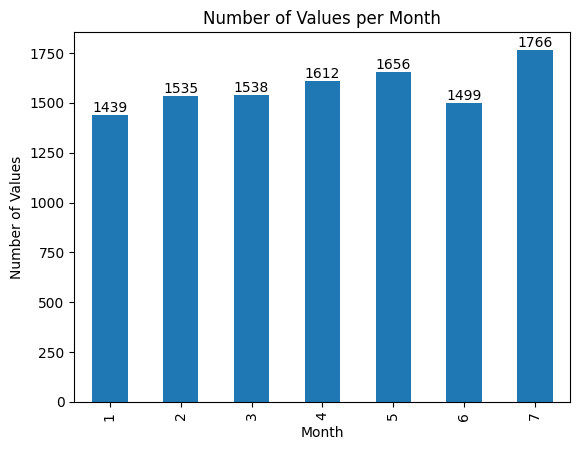

In [16]:
# Group the data by month and count the number of values
values_per_month = df2['Fecha planif.'].groupby(df2['Fecha planif.'].dt.month).count()

# Create a bar plot of the number of values per month
values_per_month.plot(kind='bar')

# Set the labels and title
plt.xlabel('Month')
plt.ylabel('Number of Values')
plt.title('Number of Values per Month')

# Add labels to the bars
for i, value in enumerate(values_per_month):
    plt.text(i, value, str(value), ha='center', va='bottom')

# Show the plot
plt.show()


In [17]:
# Group the data by month and count the number of values
print(df2['Fecha planif.'].dt.month.value_counts())
# Count the number of values per month and quirofano
values_per_quirofano_month = df2.groupby([df2['Fecha planif.'].dt.month, 'Quirofano']).size().reset_index(name='count')
values_per_quirofano_month


#filtered_data = values_per_quirofano_month[values_per_quirofano_month['Quirofano'] == 'QU-10']
#print(filtered_data)


Fecha planif.
7    1766
5    1656
4    1612
3    1538
2    1535
6    1499
1    1439
Name: count, dtype: int64


,Fecha planif.,Quirofano,count
0,1,QU-01,259
1,1,QU-02,122
2,1,QU-03,177
3,1,QU-04,211
4,1,QU-05,68
...,...,...,...
77,7,QU-08,136
78,7,QU-09,129
79,7,QU-10,108
80,7,QU-11,199


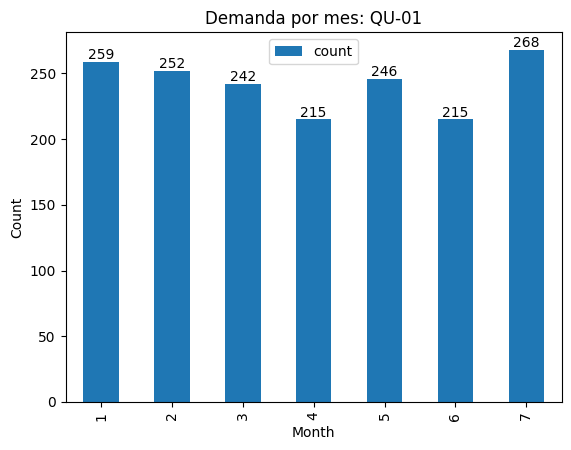

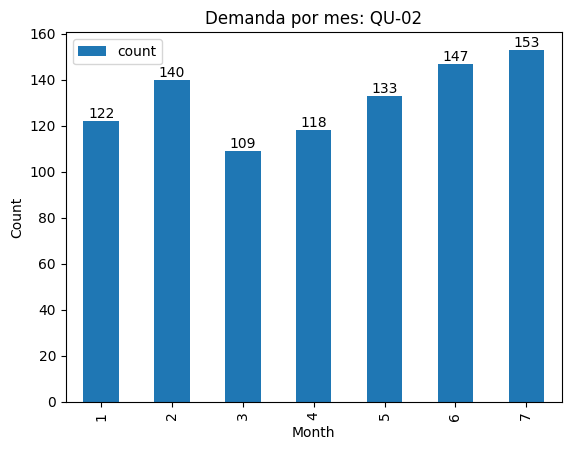

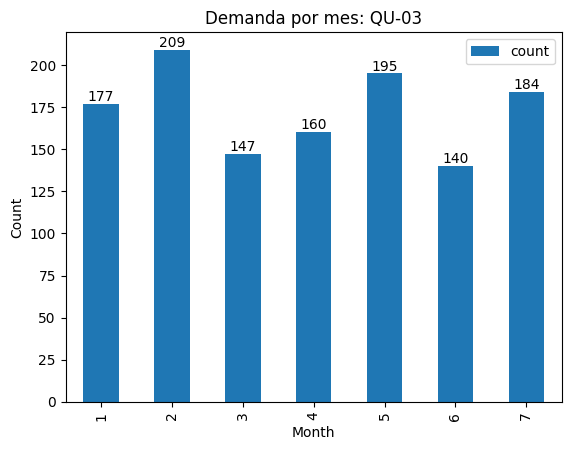

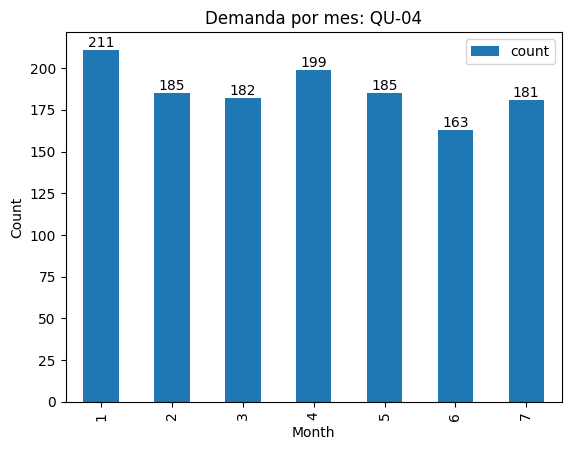

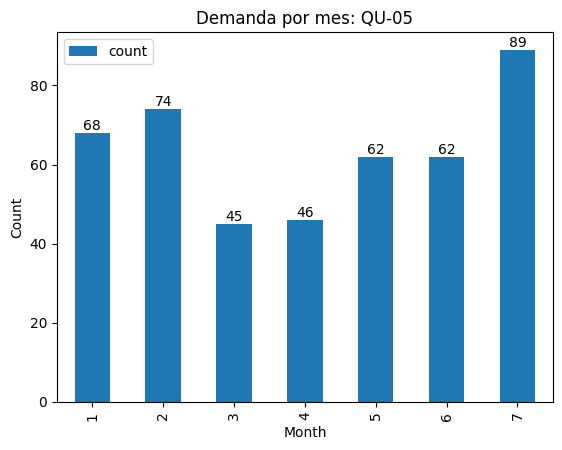

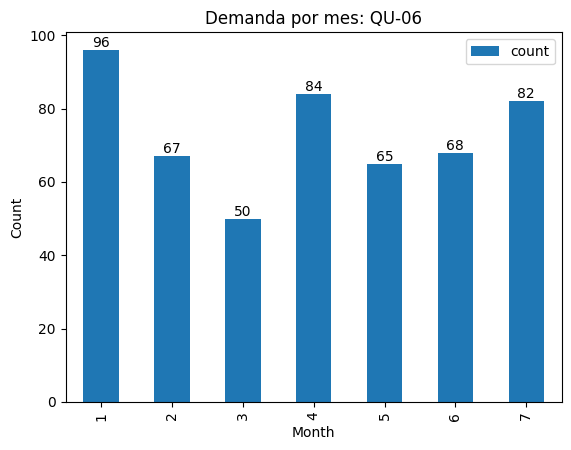

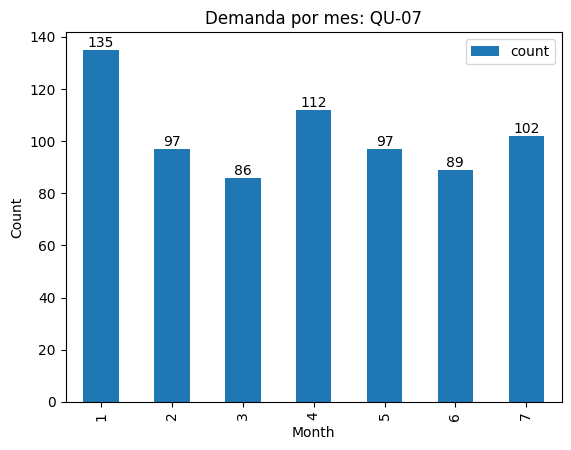

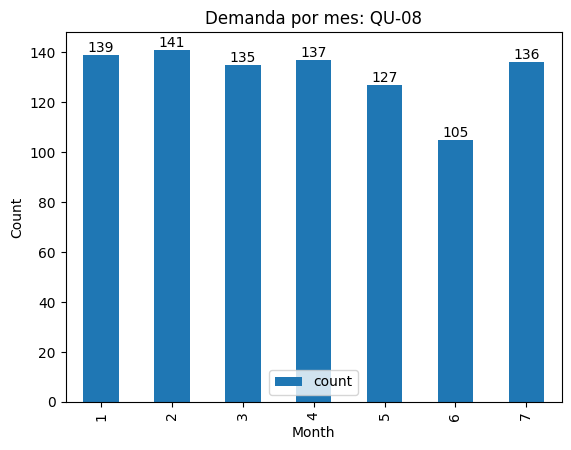

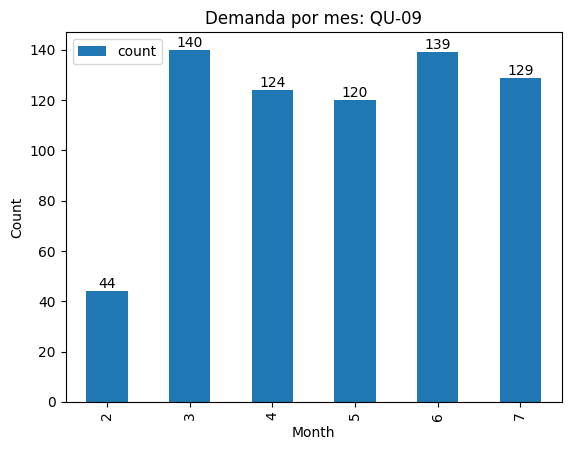

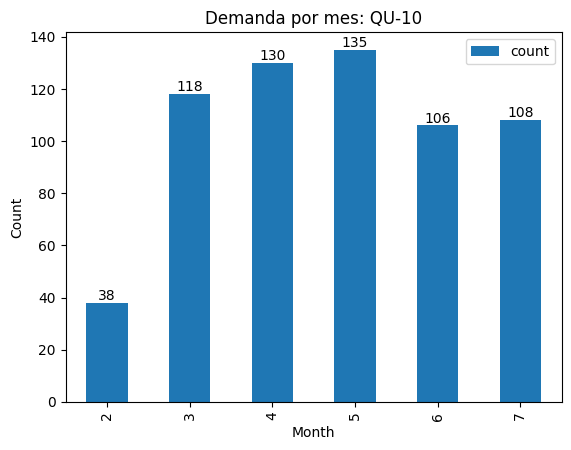

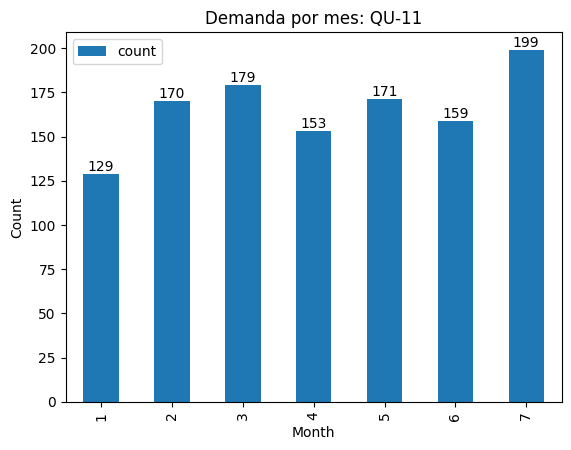

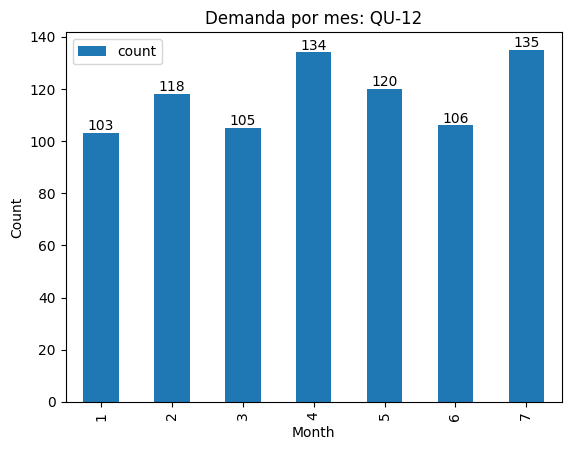

In [18]:

quirofano_values = ['QU-01', 'QU-02', 'QU-03', 'QU-04', 'QU-05', 'QU-06', 'QU-07', 'QU-08', 'QU-09', 'QU-10', 'QU-11', 'QU-12']
for quirofano in quirofano_values:

    filtered_data = values_per_quirofano_month[values_per_quirofano_month['Quirofano'] == quirofano]
    # Group the filtered data by month and count the number of values
    filtered_data_per_month = filtered_data.groupby('Fecha planif.').sum()

    # Create a bar plot of the filtered data per month
    filtered_data_per_month.plot(kind='bar')

    for i, value in enumerate(filtered_data['count']):
        plt.text(i, value, str(value), ha='center', va='bottom')

    

    # Set the labels and title
    plt.xlabel('Month')
    plt.ylabel('Count')
    plt.title(f'Demanda por mes: {quirofano}')

    # Show the plot
    plt.show()

In [19]:
df2.info()

<class 'pandas.core.frame.DataFrame'>
Index: 11045 entries, 0 to 11160
Data columns (total 20 columns):
 #   Column                    Non-Null Count  Dtype         
---  ------                    --------------  -----         
 0   Fecha planif.             11045 non-null  datetime64[ns]
 1   Hora planif.              11045 non-null  object        
 2   Fecha apertura monitor    11045 non-null  datetime64[ns]
 3   Hora apertura monitor     11045 non-null  object        
 4   Tiempo Transc (en MIN).   11045 non-null  int64         
 5   Quirofano                 11045 non-null  object        
 6   Duración                  11045 non-null  int64         
 7   Sexo                      11045 non-null  object        
 8   Edad                      11045 non-null  int64         
 9   Episodio                  11045 non-null  int64         
 10  Especialidad              11045 non-null  object        
 11  Incisión - Inicio         11045 non-null  object        
 12  Sutura - Fin           

In [58]:
df2['Cirugia - Duración'] = pd.to_datetime(df2['Cirugia - Duración'].astype(str))
df2['Minutos'] = df2['Cirugia - Duración'].dt.minute
df2['Horas'] = df2['Cirugia - Duración'].dt.hour
df2['Segundos'] = df2['Cirugia - Duración'].dt.second

df2['Duracion'] = df2['Horas'] + df2['Minutos']/60 + df2['Segundos']/3600
df2['Duracion'] = df2['Duracion'].astype(float)
df2['Mes']=df2['Fecha planif.'].dt.month

print(df2['Cirugia - Duración'].head())
print(df2['Duracion'].head())


0   2024-09-03 00:41:20
1   2024-09-03 00:30:00
2   2024-09-03 03:05:00
3   2024-09-03 02:25:00
4   2024-09-03 01:06:23
Name: Cirugia - Duración, dtype: datetime64[ns]
0    0.688889
1    0.500000
2    3.083333
3    2.416667
4    1.106389
Name: Duracion, dtype: float64


In [69]:

#Sum the duration for each Quirofano
sum_duration_per_quirofano = df2.groupby(['Mes','Quirofano'])['Duracion'].sum().reset_index(name='Tiempo Requerido Mensual')

#Print the sum of duration per Quirofano
sum_duration_per_quirofano

,Mes,Quirofano,Tiempo Requerido Mensual
0,1,QU-01,204.292778
1,1,QU-02,106.146389
2,1,QU-03,140.471944
3,1,QU-04,199.357778
4,1,QU-05,150.675833
...,...,...,...
77,7,QU-08,162.727500
78,7,QU-09,182.863056
79,7,QU-10,169.753056
80,7,QU-11,142.967222


In [63]:
df2['Duracion'].describe()

count    11045.000000
mean         1.087635
std          1.208636
min          0.000000
25%          0.416667
50%          0.750000
75%          1.333333
max         23.666667
Name: Duracion, dtype: float64

In [70]:
# Leer el conjunto de datos por medio de la URL proporcionada y asignarlo a la variable "df"

# Load the Excel file from the GitHub repository
url = "https://raw.githubusercontent.com/DavidD95/Clase_EDA_2024/main/DISPONIBILIDAD_QU.xlsx"
%pip install openpyxl
disponibilidad_QU = pd.read_excel(url)

Note: you may need to restart the kernel to use updated packages.


In [88]:
disponibilidad_QU

disponibilidad_QU['Hora Disponible Mes'] = disponibilidad_QU['Tiempo Disponible Mes'].dt.components['days']*24 + disponibilidad_QU['Tiempo Disponible Mes'].dt.components['hours'] + disponibilidad_QU['Tiempo Disponible Mes'].dt.components['minutes']/60
disponibilidad_QU[['Mes', 'Quirofano', 'Hora Disponible Mes']]



,Mes,Quirofano,Hora Disponible Mes
0,1,QU-01,210.0
1,1,QU-02,210.0
2,1,QU-03,210.0
3,1,QU-04,210.0
4,1,QU-05,210.0
...,...,...,...
79,7,QU-08,220.0
80,7,QU-09,220.0
81,7,QU-10,220.0
82,7,QU-11,220.0


In [ ]:
print ("Numero de procedimientos diferentes =",df['Procedimiento'].nunique())

print ("Numero de especialidades diferentes =",df['Especialidad'].nunique())

Numero de procedimientos diferentes = 1061
Numero de especialidades diferentes = 88


**Conclusión**

La tabla anterior muestra que el nombre de la prestación principal donde quedan guardadas las sesiones realizadas a los pacientes es la de sesiones de radioterapia que representa un 84% del total de prestaciones, ademas basados en el conocimiento del servicio podemos afirmar que esta prestación es la que nos va decir el numero de atenciones realizadas en los equipos Biomedicos

**Conclusión**

El grafico nos muestra la cantidad de sesiones de radioterapia realizadas por mes siendo el mes de mayo el que menos tuvo demanda y el mes de Enero es de mayor demanda, ademas podemos evidenciar que el promedio de sesiones al mes es de 1587 aprox. Esta información es de vital importancia para poder realizar el calculo del %Ocupación de los equipos biomedicos

**Conclusión**

Este grafico de frecuencia por franjas horarios nos muestra que el numero de sesiones que se realizan por hora es similar exeptuando el inicio 6am y al final de la jornada 7-8 pm